In [1]:
devtools::install_github("ClairBarnes/rwwa")
suppressMessages(library("rwwa"))

Skipping install of 'rwwa' from a github remote, the SHA1 (533d8a6e) has not changed since last install.
  Use `force = TRUE` to force installation



# Trend fitting - precip

## DJF or JJ

In [2]:
gmst <- read.table("ts_obs/gmst.txt", col.names = c("year", "gmst"))
gmst$gmst <- gmst$gmst - gmst$gmst[gmst$year == 2024]

cov_2024 <- data.frame(gmst = 0)
cov_cf <- data.frame(gmst = c("pi" = -1.2, "2000" = -0.5))

In [5]:
datasets <- list("era5" = "era5-05", "mswx" = "mswx", "chirps" = "chirps")

datasets_djf <- sapply(datasets, function(ds) load_ts(paste0("ts_obs/pantanal-fires_pr-djf_",ds,".dat"), col.names = c("year", "pr")), simplify = F)        
datasets_jj <- sapply(datasets, function(ds) load_ts(paste0("ts_obs/pantanal-fires_pr-jj_",ds,".dat"), col.names = c("year", "pr")), simplify = F)

## Check normality

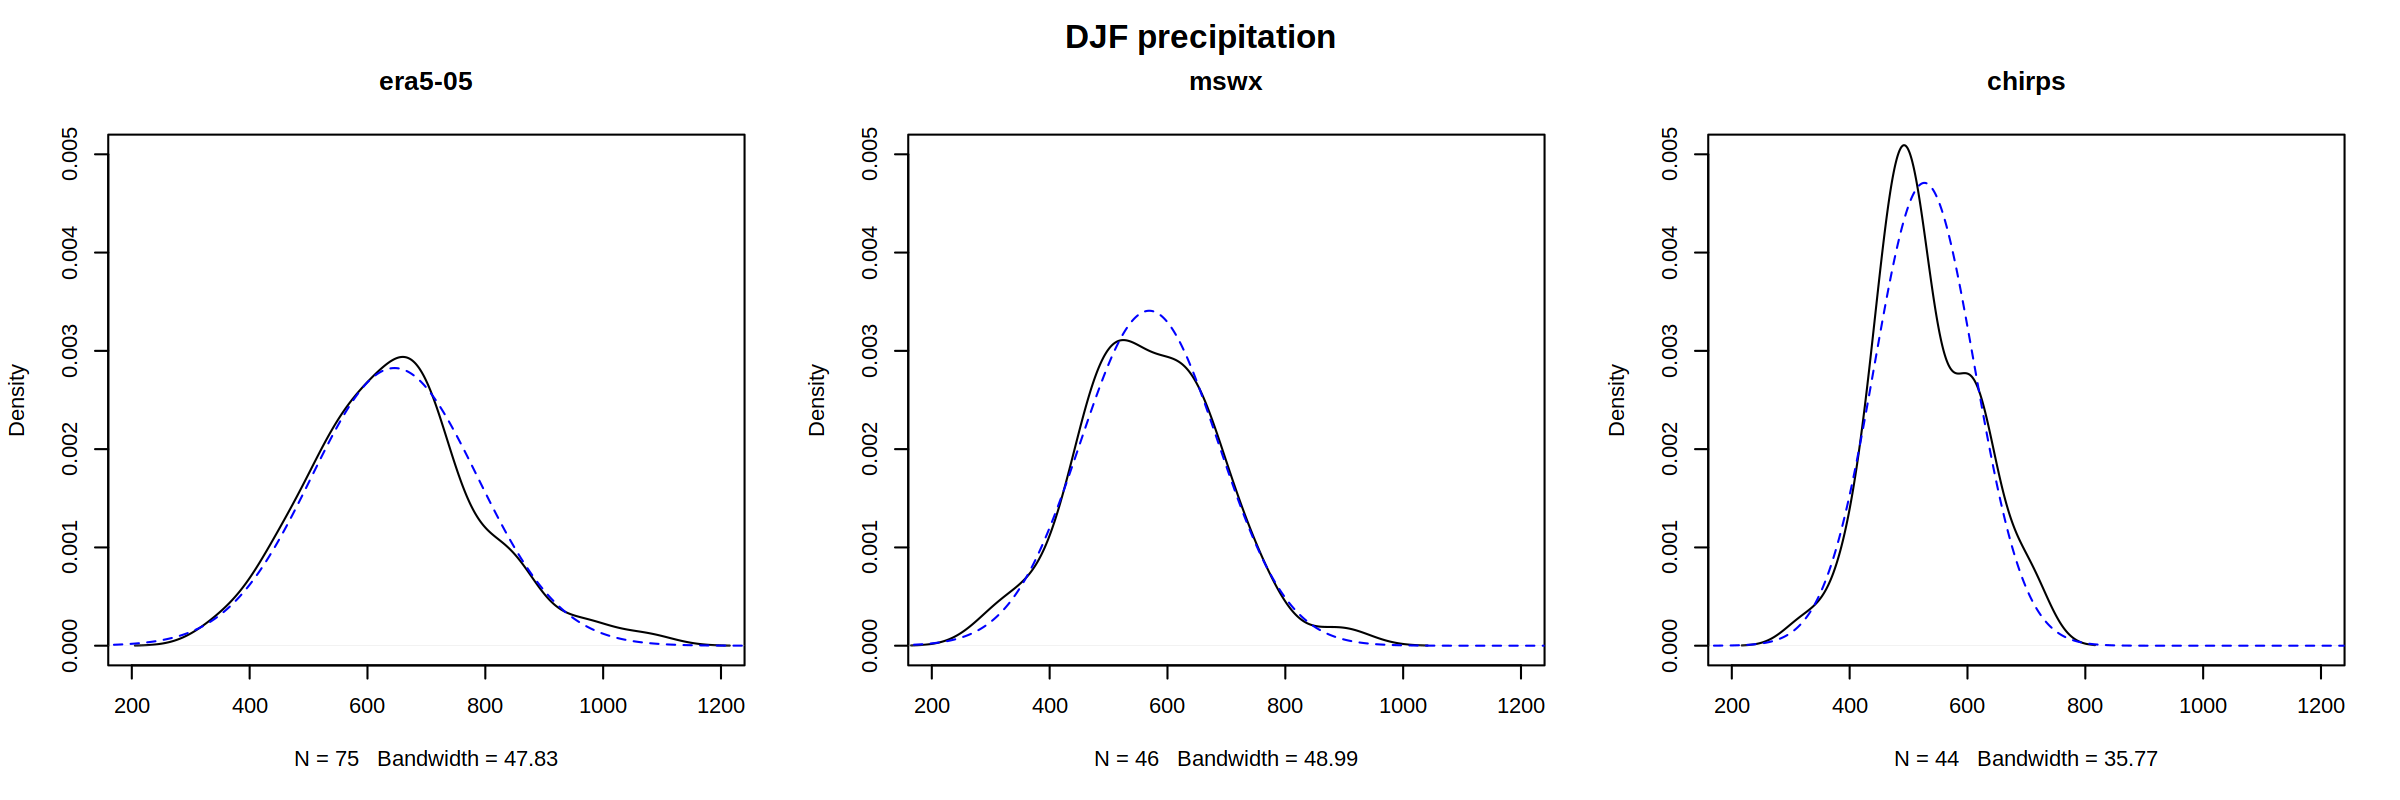

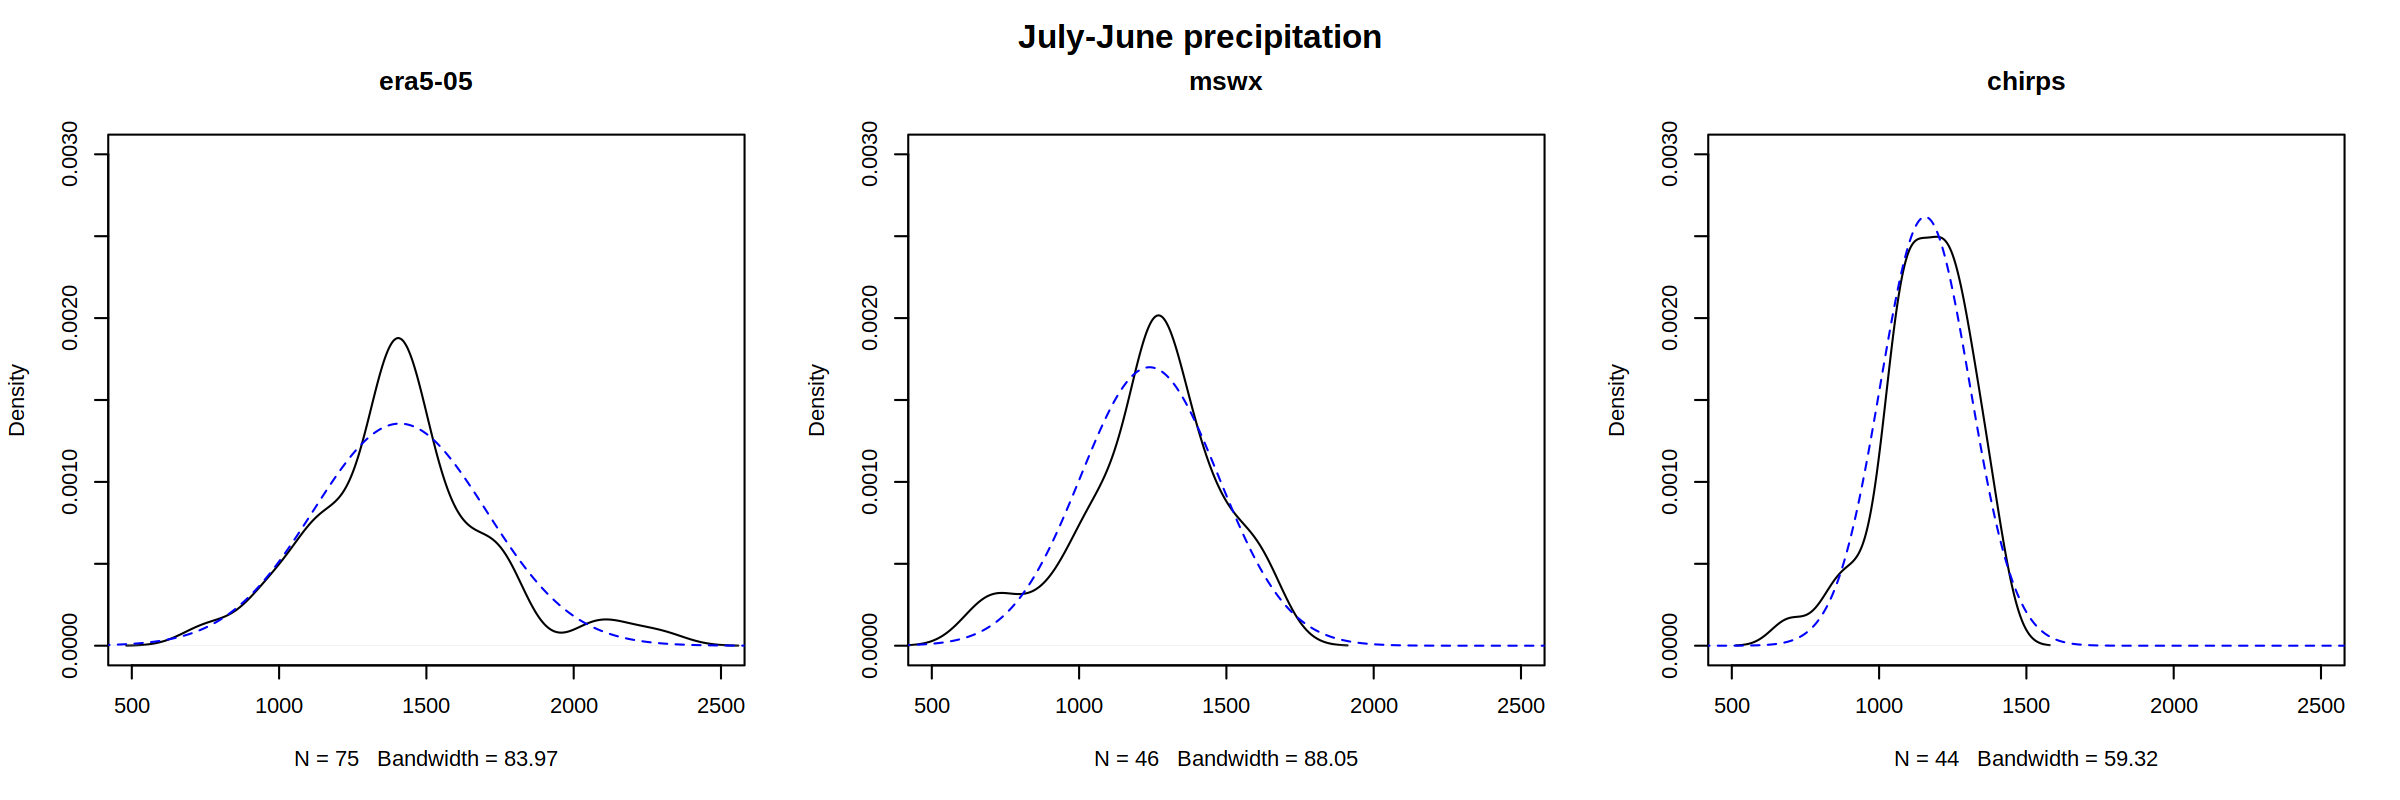

In [7]:
prep_window(c(1,3), oma = c(0,0,1,0))
for(i in 1:3) {
    djf <- datasets_djf[[i]]$pr
    plot(density(djf), ylim = c(0,0.005), xlim = c(200,1200), main = datasets[[i]])
    x <- seq(0,1500)
    lines(x, dnorm(x, mean(djf), sd(djf)), col = "blue", lty = 2)
}
mtext("DJF precipitation", outer = T, font = 2, line = -1)

for(i in 1:3) {
    
    jj <- datasets_jj[[i]]$pr
    plot(density(jj), ylim = c(0,0.003), xlim = c(500,2500), main = datasets[[i]])
    x <- seq(0,3000)
    lines(x, dnorm(x, mean(jj), sd(jj)), col = "blue", lty = 2)
}
mtext("July-June precipitation", outer = T, font = 2, line = -1)

# normal distribution looks fine for either

## Compare model fit

In [8]:
models_djf <- sapply(datasets_djf, function(df) fit_ns("norm", "fixeddisp", merge(gmst, df), "pr", c("gmst"), lower = T), simplify = F)
models_jj <- sapply(datasets_jj, function(df) fit_ns("norm", "fixeddisp", merge(gmst, df), "pr", c("gmst"), lower = T), simplify = F)

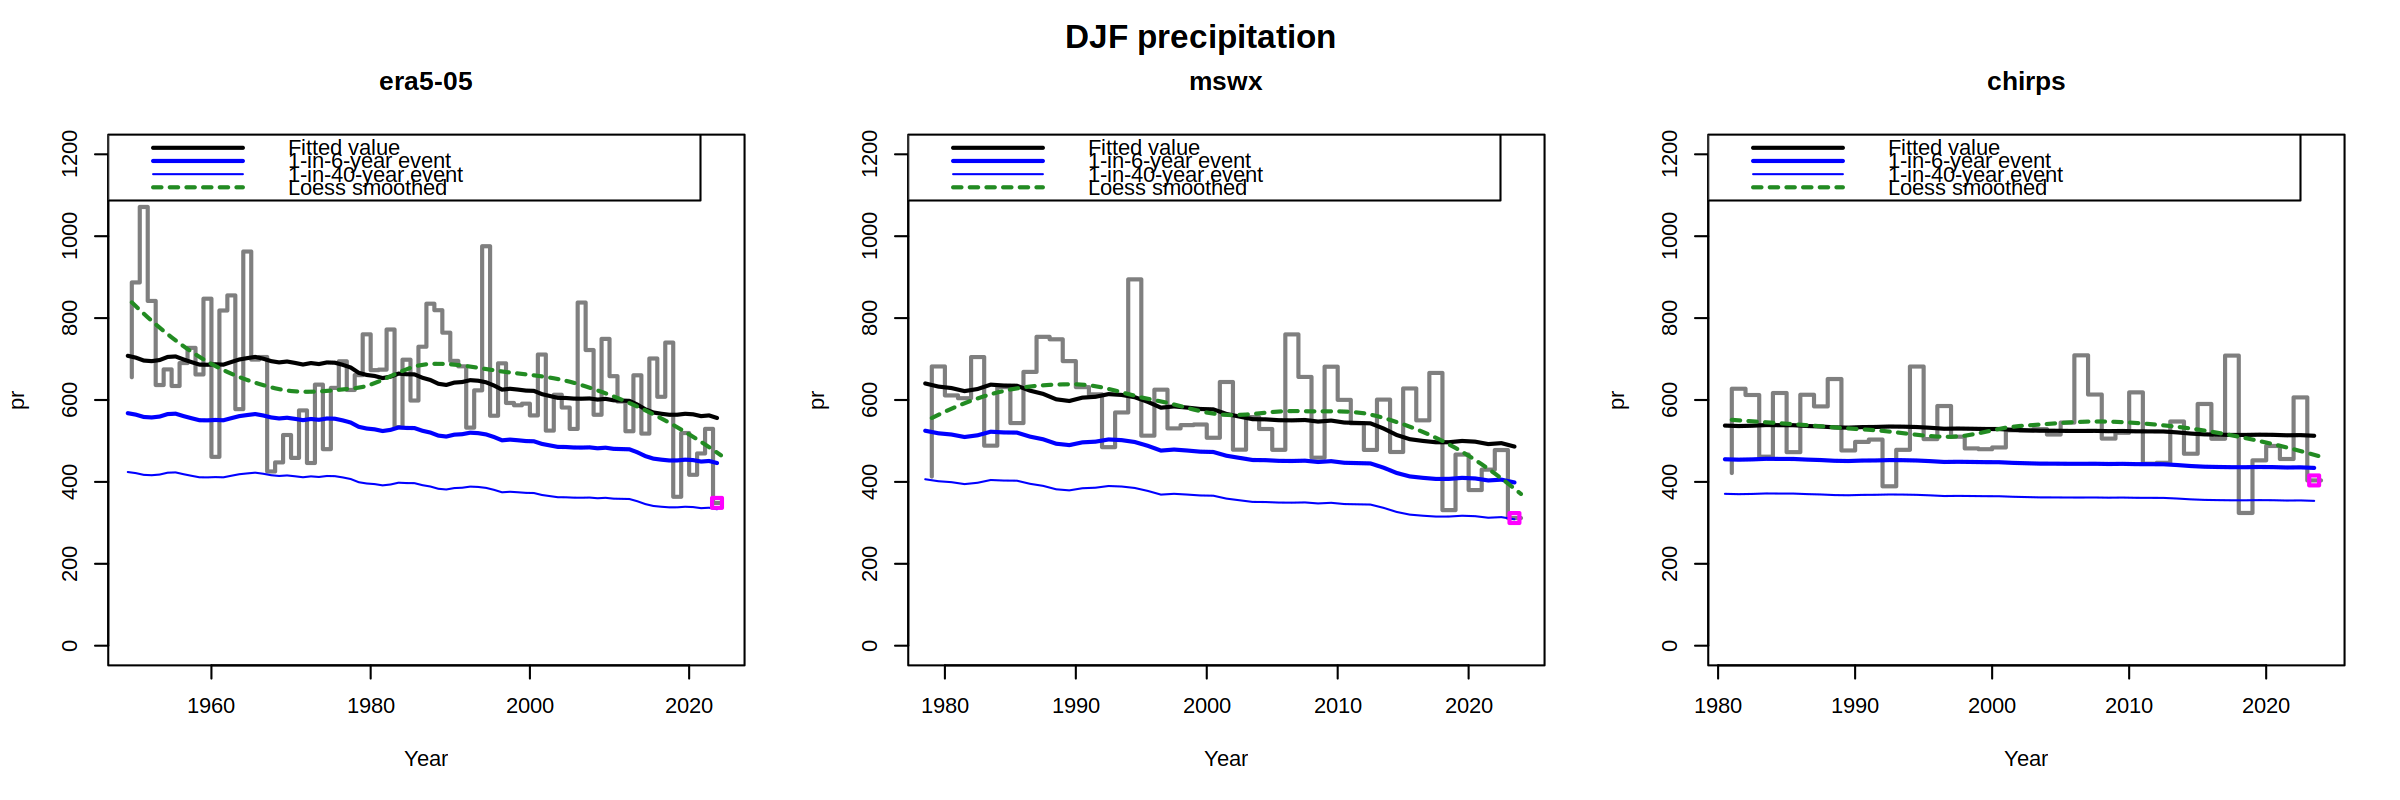

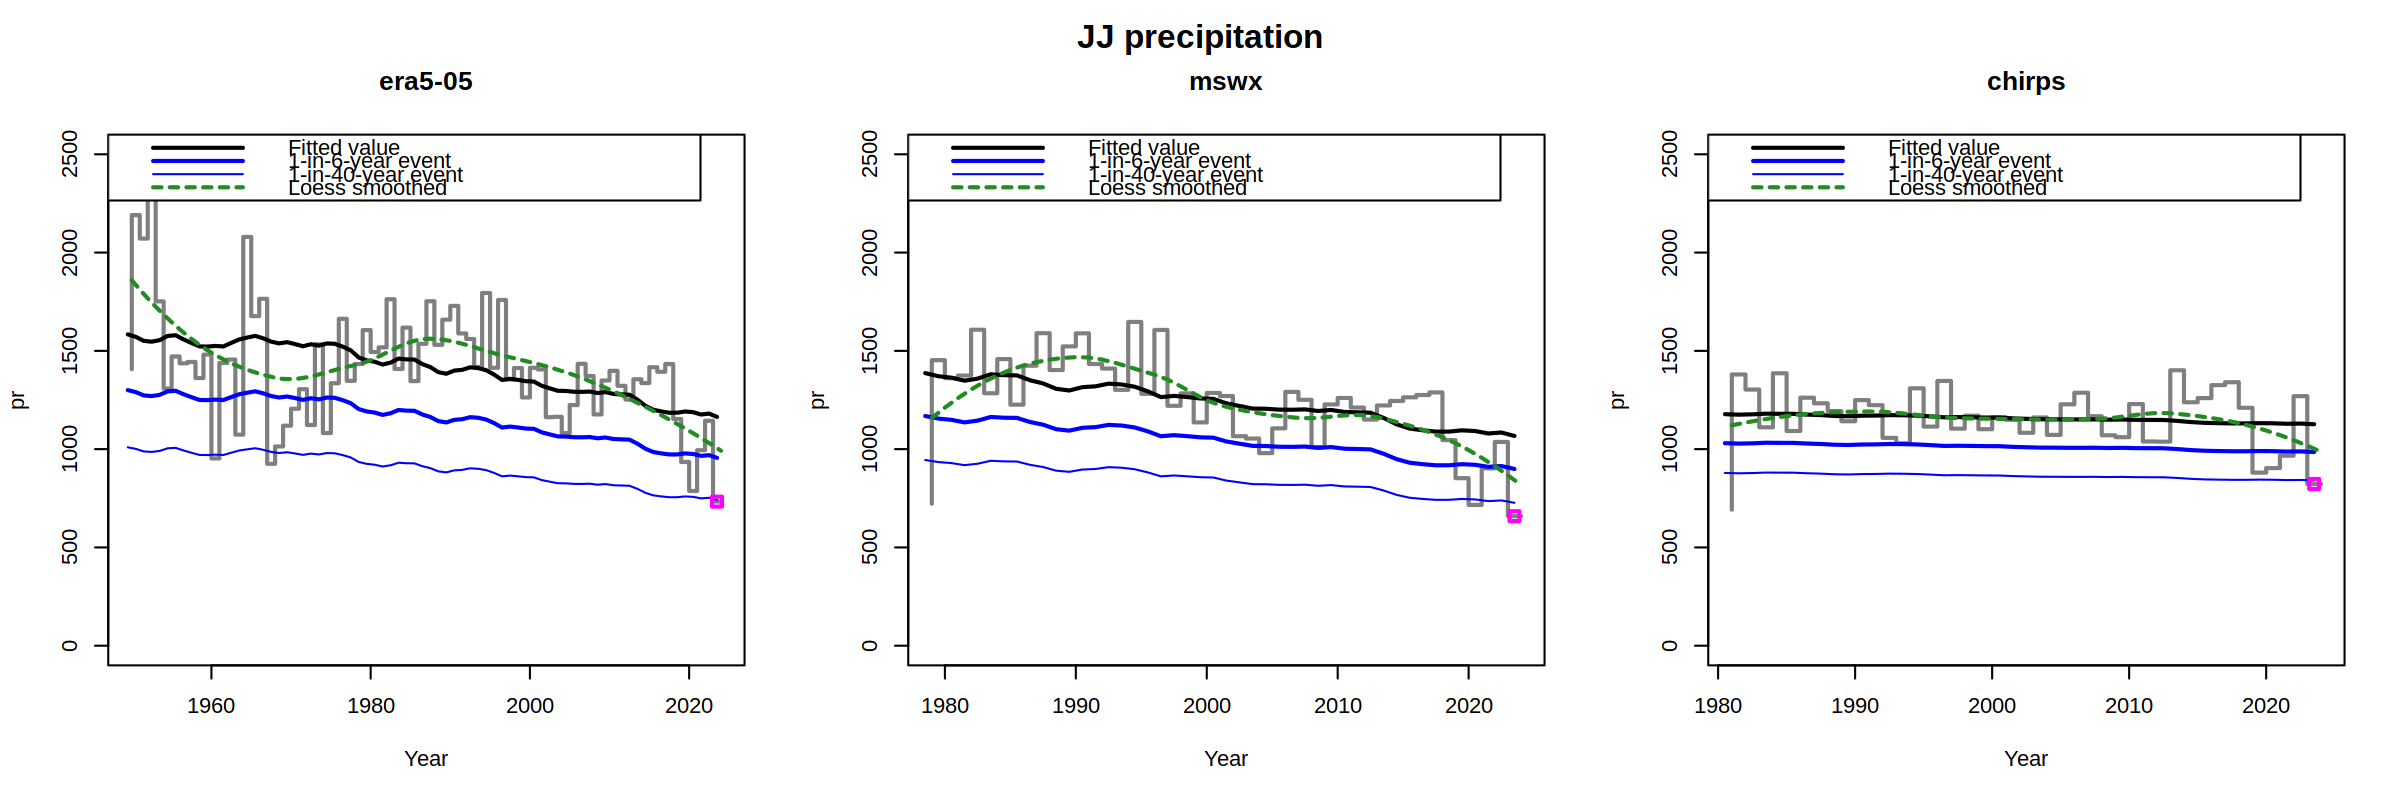

In [20]:
for (s in c("djf", "jj")) {
    
    prep_window(c(1,3), oma = c(0,0,1,0))
    for (i in 1:3) {

        mdl <- get(paste0("models_",s))[[i]]
        ylim <- switch(s, "djf" = c(0,1200), "jj" = c(0,2500))
        plot_trend(mdl, add_loess = T, main = datasets[[i]], ylim = ylim)
    }
    mtext(paste(toupper(s), "precipitation"), outer = T, font = 2, line = -1)
}

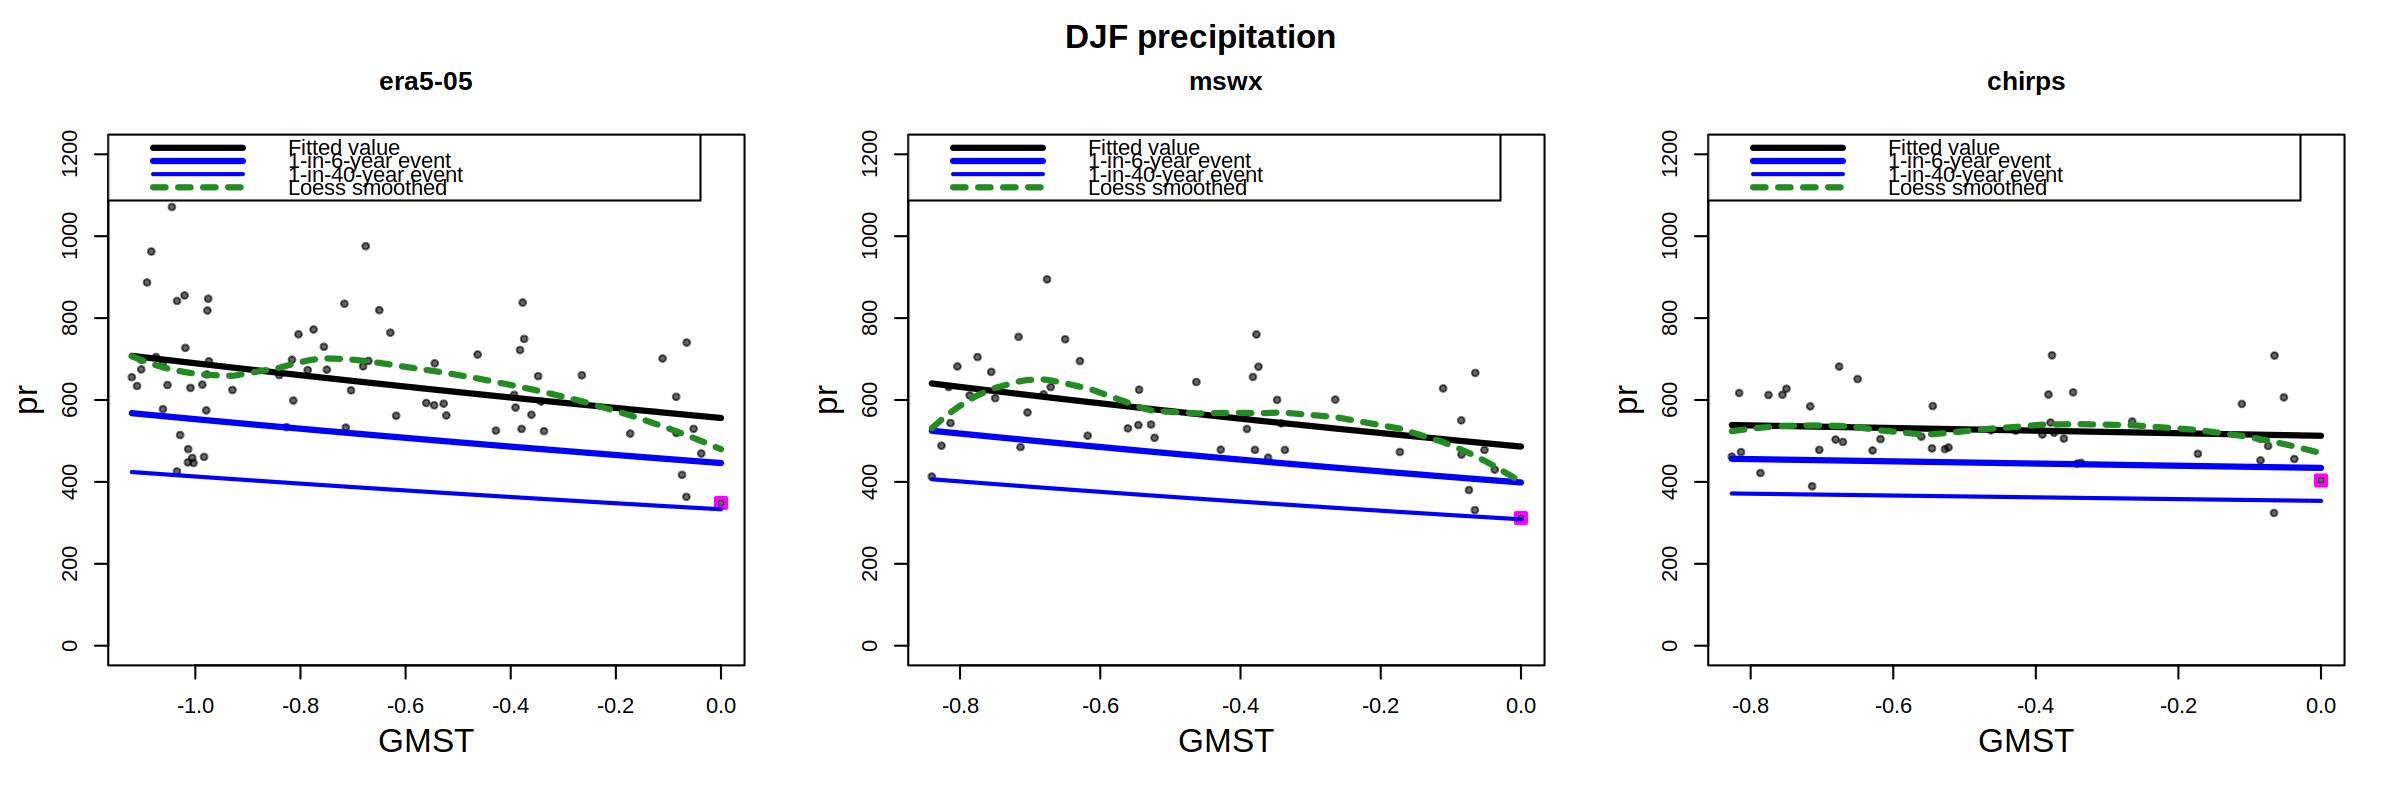

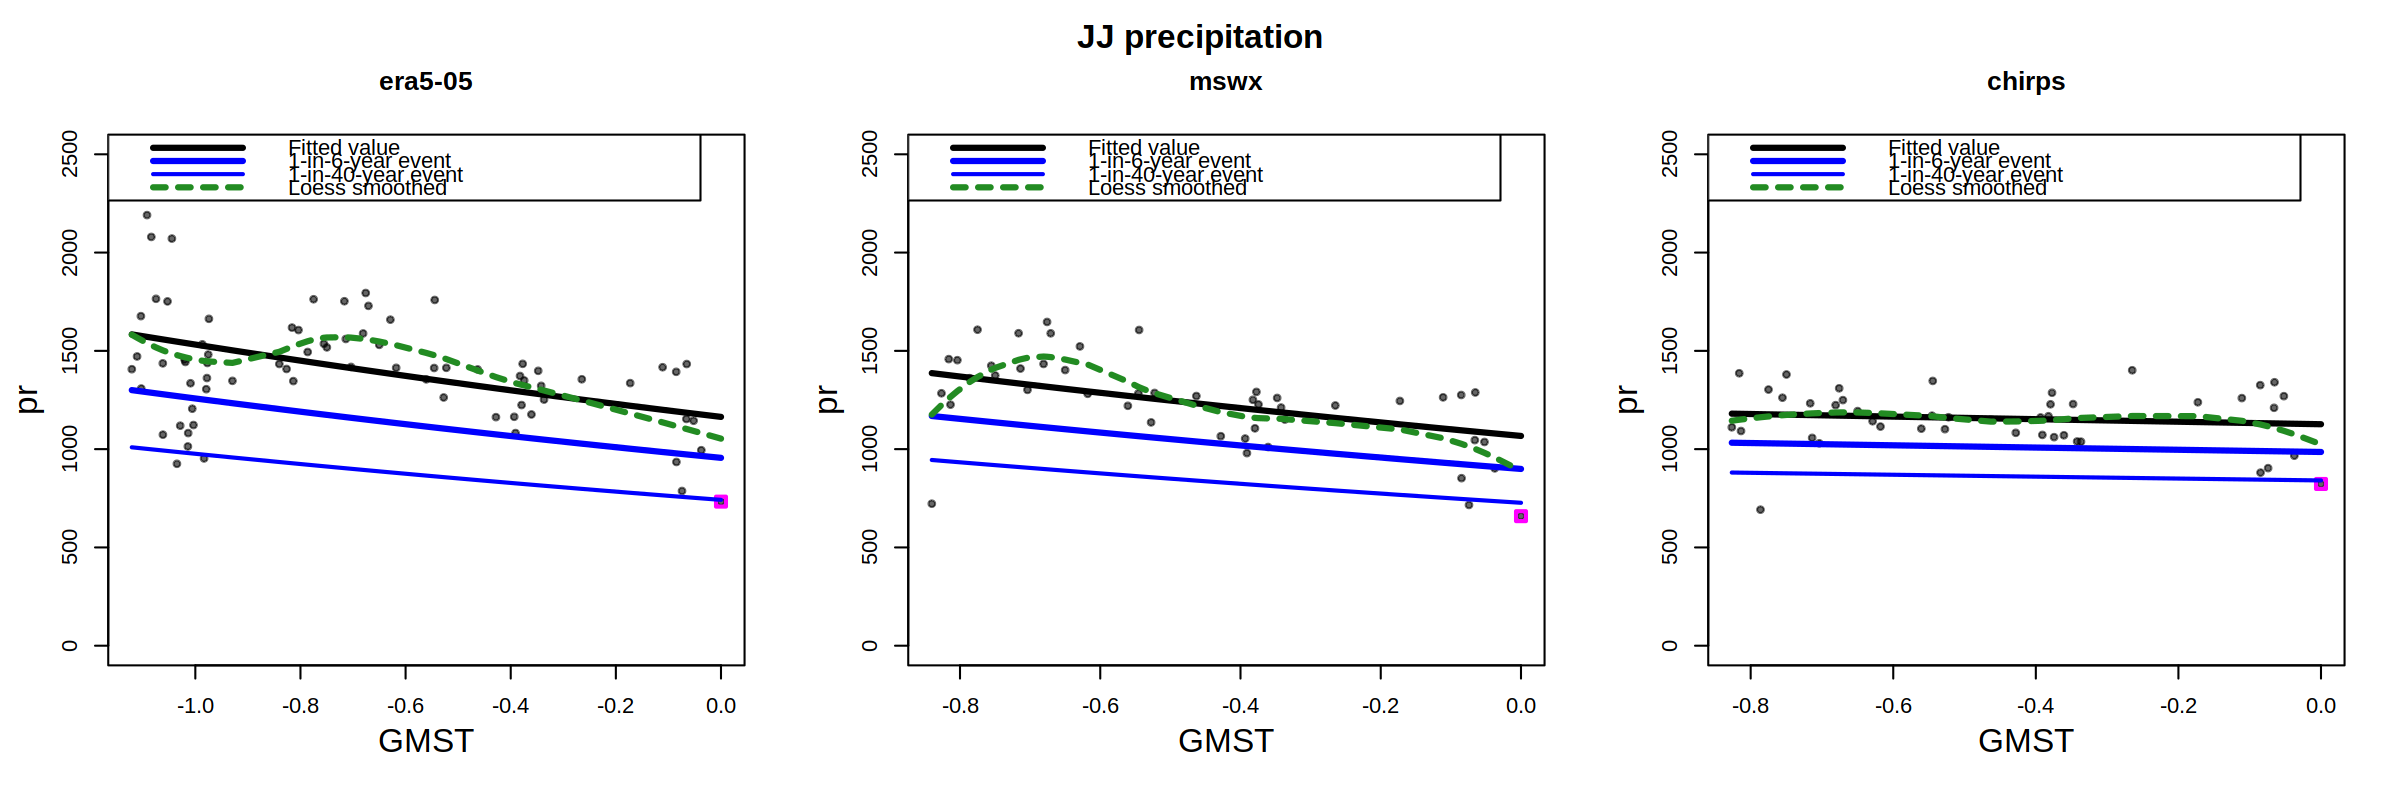

In [21]:
for (s in c("djf", "jj")) {
    
    prep_window(c(1,3), oma = c(0,0,1,0))
    for (i in 1:3) {

        mdl <- get(paste0("models_",s))[[i]]
        ylim <- switch(s, "djf" = c(0,1200), "jj" = c(0,2500))
        plot_covtrend(mdl, "gmst", add_loess = T, main = datasets[[i]], ylim = ylim)
    }
    mtext(paste(toupper(s), "precipitation"), outer = T, font = 2, line = -1)
}

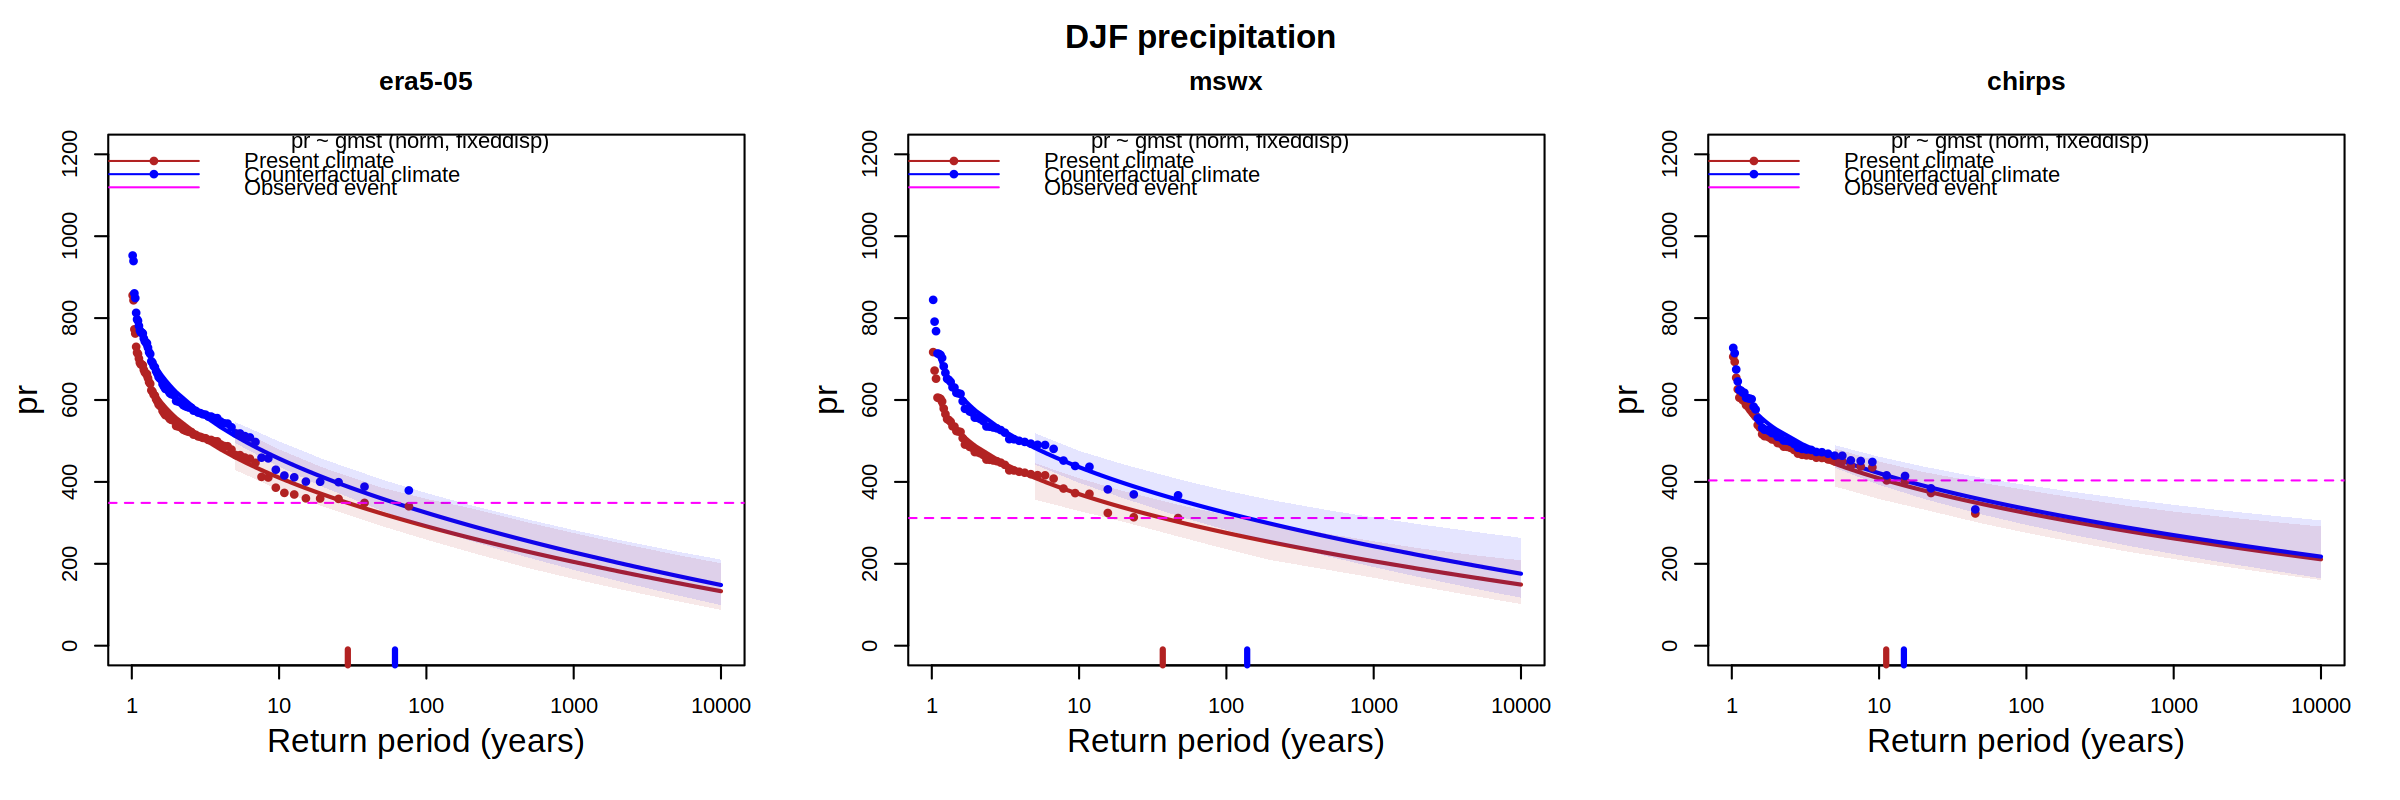

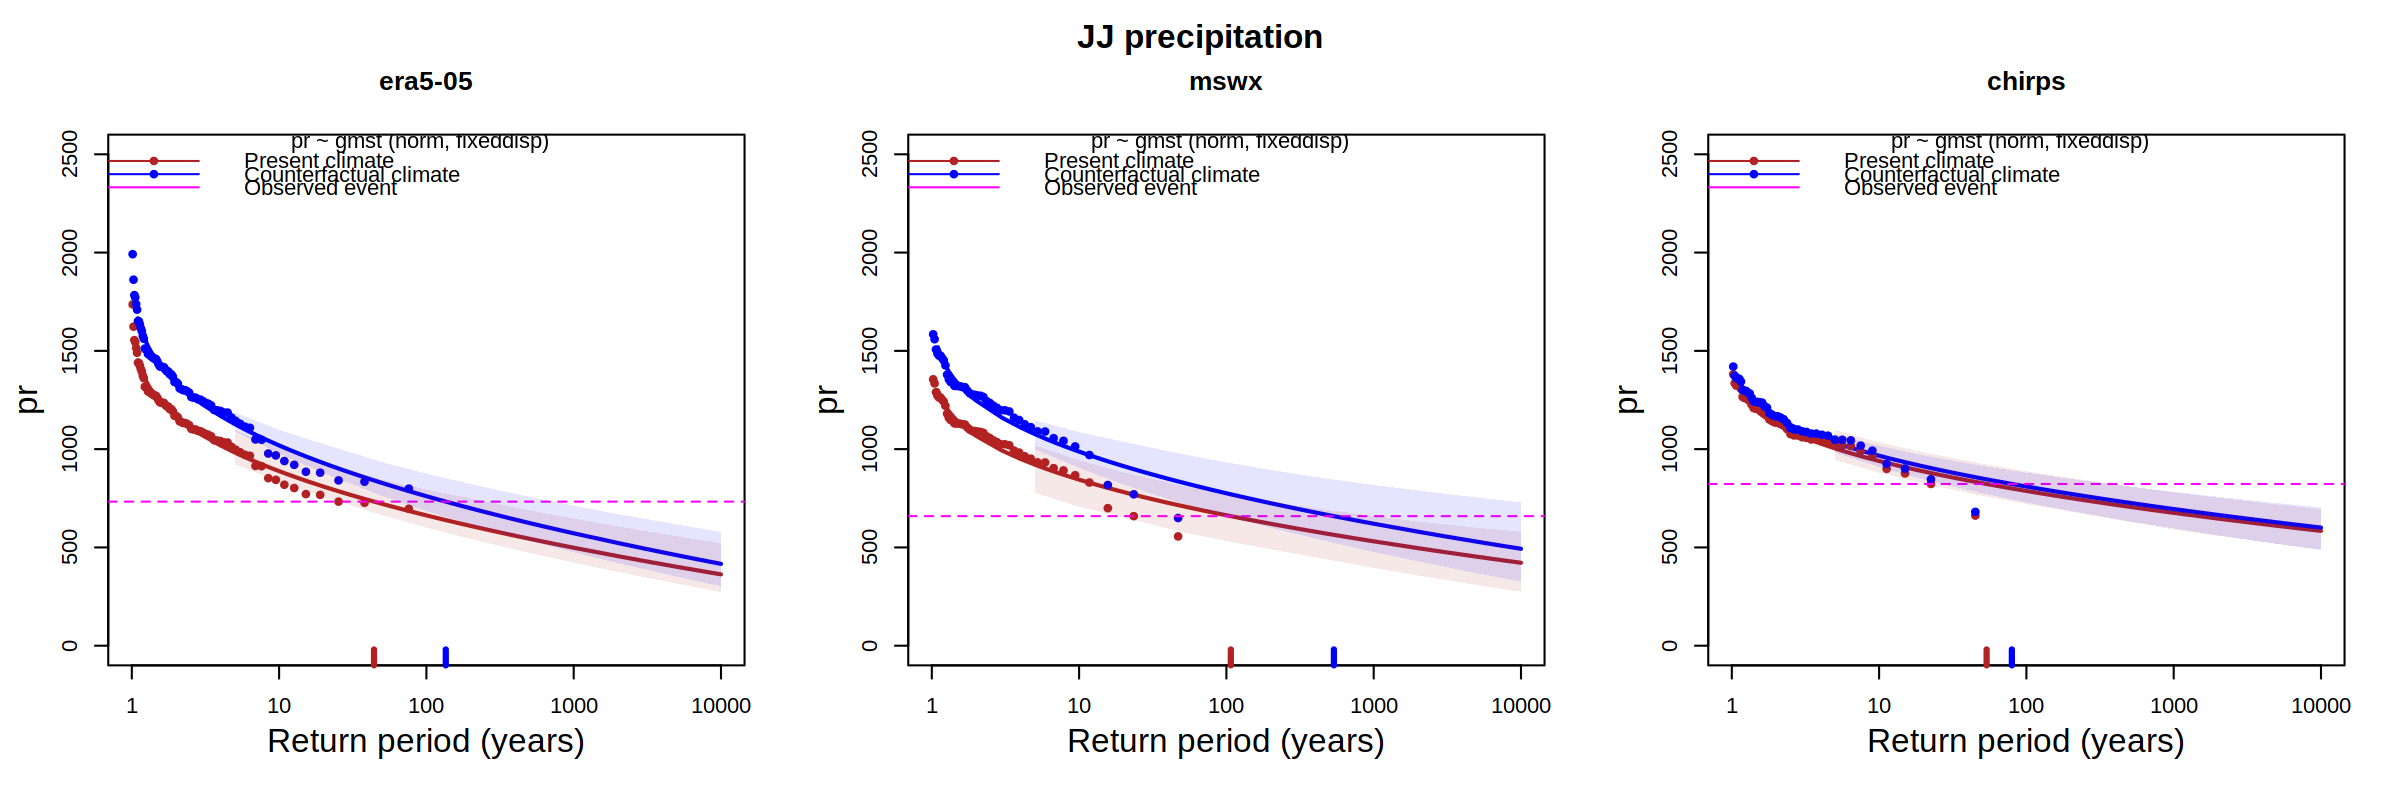

In [19]:
for (s in c("djf", "jj")) {
    
    prep_window(c(1,3), oma = c(0,0,1,0))
    for (i in 1:3) {

        mdl <- get(paste0("models_",s))[[i]]
        ylim <- switch(s, "djf" = c(0,1200), "jj" = c(0,2500))
        plot_returnlevels(mdl, cov_f = cov_2024, cov_cf = cov_cf["2000",,drop = F], main = datasets[[i]], nsamp = 50, ylim = ylim)
    }
    mtext(paste(toupper(s), "precipitation"), outer = T, font = 2, line = -1)
}